<a href="https://colab.research.google.com/github/denniss83/Turkiye_isgucu_Piyasasi_Analizi_2015_2024/blob/main/T%C3%BCrkiye_%C4%B0%C5%9Fg%C3%BCc%C3%BC_Piyasas%C4%B1_Analizi_(2015%E2%80%932024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Türkiye İşgücü Piyasası Analizi (2015–2024)

> ⚠️ **Uyarı**  
> Bu çalışma, Python programlama dili ve veri analizi becerilerini geliştirmek amacıyla hazırlanmıştır.  
> Kullanılan veriler açık kaynaklardan alınmış ve manuel olarak düzenlenmiştir.  
> Veri temizleme sürecinde olası hatalar veya eksiklikler analiz sonuçlarını etkileyebilir.  
> Bu nedenle grafik ve bulgular kesin ekonomik yorumlar için uygun değildir.


## 📌 Proje Amacı  
Türkiye'de 2015–2024 yılları arasında işgücü, istihdam, işsizlik ve işgücüne dahil olmayan nüfusa ait veriler üzerinden çeşitli grafiksel ve sayısal analizler gerçekleştirilmiştir. Bu analizler ile yıllara göre eğilimler, oranlar, değişim hızları ve değişkenler arası ilişkiler incelenmiştir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

## 1️⃣ Verilerin Yüklenmesi ve Hazırlanması  
- Excel dosyasından tablolar okundu.
- Geniş formattaki veriler `melt()` ile uzun formata çevrildi.
- Aşağıdaki veri setleri oluşturuldu:
  - İşgücü (Bin)
  - İstihdam (Bin)
  - İşgücüne Dahil Olmayan (Bin)
  - İşsiz Sayısı (Bin) → (İşgücü – İstihdam ile hesaplandı)
  - İşsizlik Oranı (%) → Gerçek oranlar filtrelendi

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dahilolmayan.csv to dahilolmayan (1).csv
Saving isgucu.csv to isgucu (1).csv
Saving issizlikoran.csv to issizlikoran (1).csv
Saving istihdam.csv to istihdam (1).csv


In [3]:
df_issizlik = pd.read_csv("issizlikoran.csv", skiprows=5)
df_istihdam = pd.read_csv("istihdam.csv", skiprows=5)
df_isgucu = pd.read_csv("isgucu.csv", skiprows=5)
df_dahil_olmayan = pd.read_csv("dahilolmayan.csv", skiprows=5)

In [4]:
print("📊 İşsizlik Oranı:")
display(df_issizlik.head())

print("👷‍♂️ İstihdam:")
display(df_istihdam.head())

print("🧾 İşgücü:")
display(df_isgucu.head())

print("🚫 Dahil Olmayan:")
display(df_dahil_olmayan.head())

📊 İşsizlik Oranı:


,||2015|26621.0|
0,||2016|27205.0|
1,||2017|28189.0|
2,||2018|28738.0|
3,||2019|28080.0|
4,||2020|26812.0|


👷‍♂️ İstihdam:


,||2015|26621.0|
0,||2016|27205.0|
1,||2017|28189.0|
2,||2018|28738.0|
3,||2019|28080.0|
4,||2020|26812.0|


🧾 İşgücü:


,||2015|26621.0|
0,||2016|27205.0|
1,||2017|28189.0|
2,||2018|28738.0|
3,||2019|28080.0|
4,||2020|26812.0|


🚫 Dahil Olmayan:


,||2015|26621.0|
0,||2016|27205.0|
1,||2017|28189.0|
2,||2018|28738.0|
3,||2019|28080.0|
4,||2020|26812.0|


In [5]:
def ayir_yil_deger(df_raw, kategori_adi):
    df = df_raw.copy()
    df.columns = ['ham_veri']

    df['ham_veri'] = df['ham_veri'].astype(str).str.strip('|').str.strip()

    df = df[df['ham_veri'].str.match(r'^\d{4}')]

    df['Yıl'] = df['ham_veri'].str.slice(0, 4).astype(int)
    df['Değer'] = df['ham_veri'].str.slice(4)
    df['Değer'] = df['Değer'].str.replace(r'[^\d.]', '', regex=True)
    df['Değer'] = pd.to_numeric(df['Değer'], errors='coerce')

    df['Kategori'] = kategori_adi
    df = df.dropna(subset=['Değer'])

    return df[['Yıl', 'Değer', 'Kategori']]

In [6]:
df1 = ayir_yil_deger(df_istihdam, 'İstihdam (Bin)')
df2 = ayir_yil_deger(df_isgucu, 'İşgücü (Bin)')
df3 = ayir_yil_deger(df_dahil_olmayan, 'Dahil Olmayan (Bin)')
df4 = ayir_yil_deger(df_issizlik, 'İşsizlik Oranı (%)')

display(df1.head())
display(df4.tail())

,Yıl,Değer,Kategori
0,2016,27205.0,İstihdam (Bin)
1,2017,28189.0,İstihdam (Bin)
2,2018,28738.0,İstihdam (Bin)
3,2019,28080.0,İstihdam (Bin)
4,2020,26812.0,İstihdam (Bin)


,Yıl,Değer,Kategori
530,2020,12.9,İşsizlik Oranı (%)
531,2021,12.5,İşsizlik Oranı (%)
532,2022,11.3,İşsizlik Oranı (%)
533,2023,9.9,İşsizlik Oranı (%)
534,2024,9.2,İşsizlik Oranı (%)


In [7]:
df_birlesik = pd.concat([df1, df2, df3, df4], ignore_index=True)

## 2️⃣ Yıllara Göre İşsizlik Oranı Görselleştirmesi

Bu bölümde, 2015–2024 yılları arasındaki işsizlik oranı (%) grafiksel olarak analiz edilmiştir.  
Güven aralıklı çizgi grafikte her yıl için işsizlik oranı noktaları işaretlenmiş ve değişim trendi açıkça gösterilmiştir.  
Veriler yalnızca %0–%100 arasında olan oranları içerecek şekilde filtrelenmiştir.


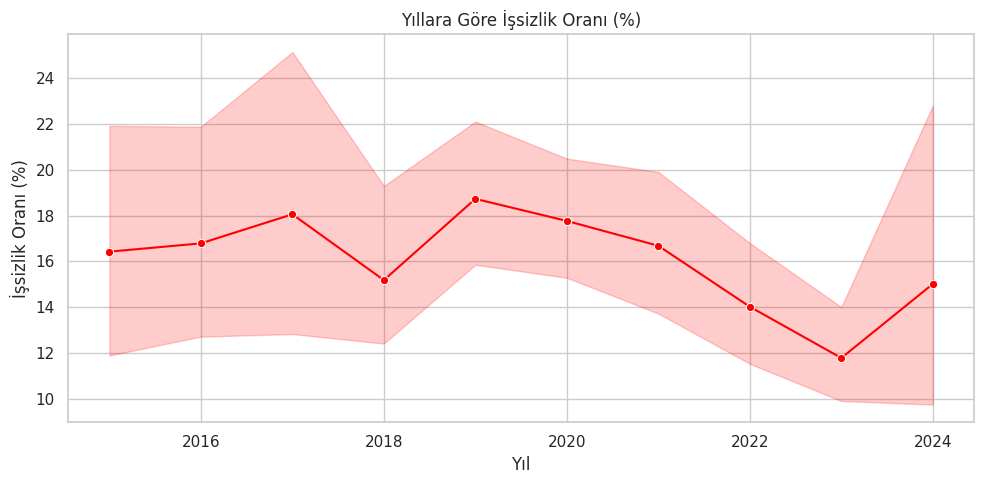

In [8]:
df4_yuzde = df4[(df4['Değer'] > 0) & (df4['Değer'] < 100)]

plt.figure(figsize=(10, 5))
sns.lineplot(data=df4_yuzde, x="Yıl", y="Değer", color="red", marker="o")
plt.title("Yıllara Göre İşsizlik Oranı (%)")
plt.ylabel("İşsizlik Oranı (%)")
plt.xlabel("Yıl")
plt.grid(True)
plt.tight_layout()
plt.show()

## 3️⃣ İşgücü, İstihdam ve Hesaplanan İşsiz Sayısı (2015–2024)

Bu bölümde Türkiye işgücü piyasasına ilişkin üç temel gösterge — işgücü, istihdam ve işsiz sayısı — yıllara göre analiz edilmiştir.  
Veriler bin kişi cinsinden sunulmuş olup, "İşsiz (Hesaplanan)" serisi, işgücü ve istihdam farkı ile türetilmiştir.  
Grafik, işgücü piyasasındaki eğilimleri ve potansiyel dengesizlikleri daha net görselleştirmeyi amaçlamaktadır.

In [9]:
df_issiz = pd.merge(df2, df1, on="Yıl", suffixes=("_İşgücü", "_İstihdam"))

df_issiz['Değer'] = df_issiz['Değer_İşgücü'] - df_issiz['Değer_İstihdam']
df_issiz['Kategori'] = 'İşsiz (Hesaplanan)'
df_issiz = df_issiz[['Yıl', 'Değer', 'Kategori']]

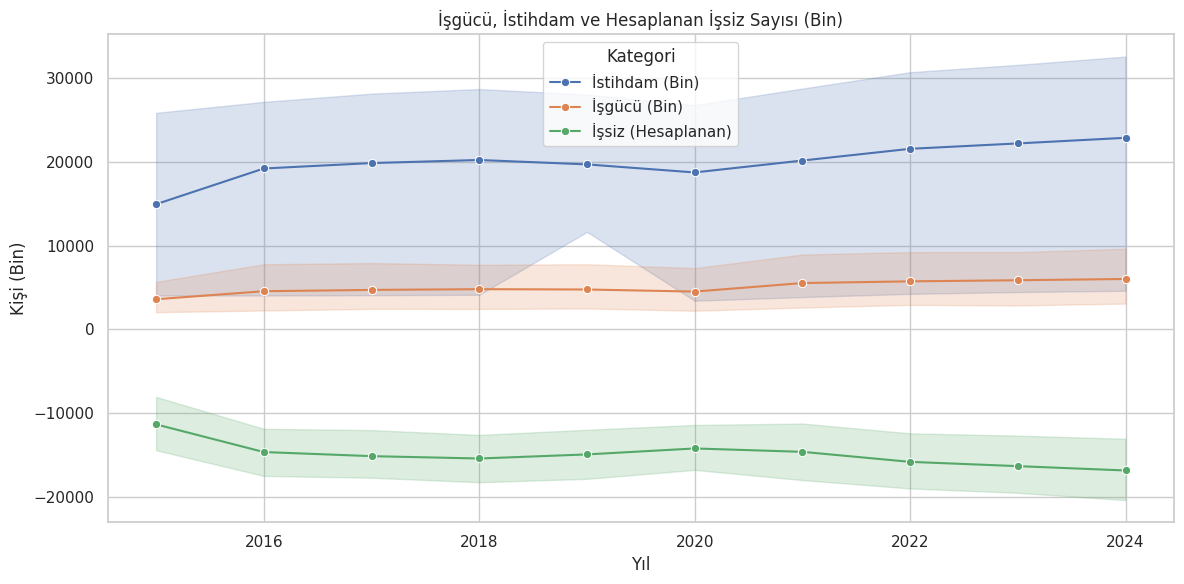

In [10]:
df_trend = pd.concat([df1, df2, df_issiz], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trend, x="Yıl", y="Değer", hue="Kategori", marker="o")
plt.title("İşgücü, İstihdam ve Hesaplanan İşsiz Sayısı (Bin)")
plt.ylabel("Kişi (Bin)")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4️⃣ Yıllara Göre İşgücü Piyasası Göstergeleri

Bu bölümde işgücü piyasasına dair dört temel gösterge — istihdam, işgücü, işgücüne dahil olmayanlar ve hesaplanan işsiz sayısı — yıllık bazda ayrı grafiklerle görselleştirilmiştir.  
Her grafik kendi belirsizlik aralığı (confidence interval) ile sunulmuş ve trendlerin yıllar içindeki seyri detaylıca incelenmiştir.  
Bu gösterimler, işgücü piyasasındaki yapısal değişimleri ve olası dengesizlikleri daha net analiz etmeyi sağlar.

In [11]:
df_issiz = pd.merge(df2, df1, on='Yıl', suffixes=('_İşgücü', '_İstihdam'))

df_issiz['Değer'] = df_issiz['Değer_İşgücü'] - df_issiz['Değer_İstihdam']
df_issiz['Kategori'] = 'İşsiz (Hesaplanan)'

df_issiz = df_issiz[['Yıl', 'Değer', 'Kategori']]

In [12]:
df_birlesik = pd.concat([df1, df2, df3, df4, df_issiz], ignore_index=True)

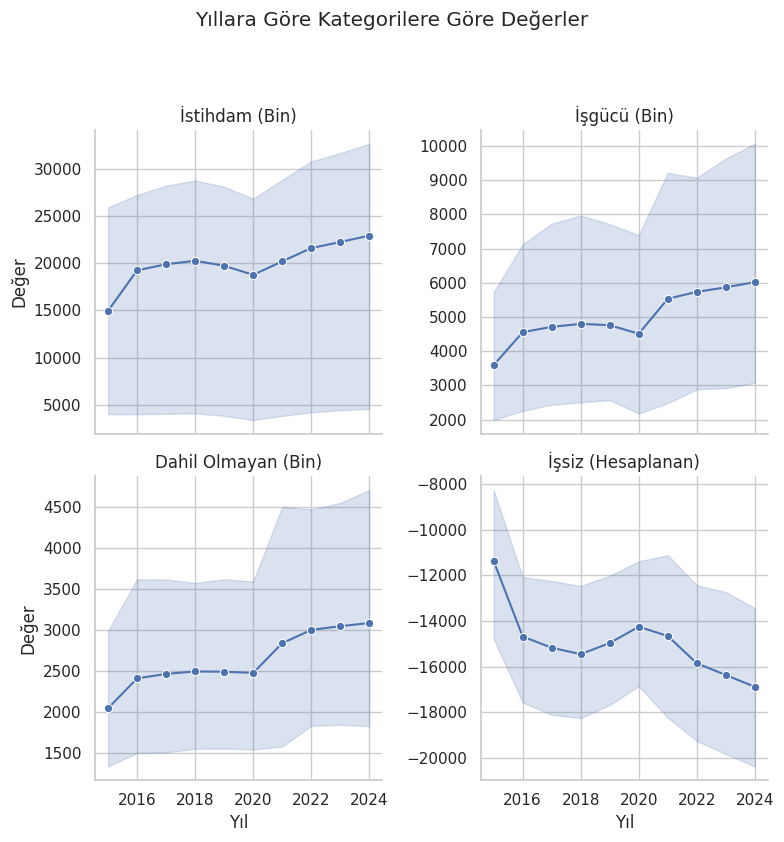

In [13]:
g = sns.FacetGrid(df_birlesik[df_birlesik['Kategori'] != 'İşsizlik Oranı (%)'],
                  col='Kategori', col_wrap=2, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='Yıl', y='Değer', marker='o')
g.set_titles("{col_name}")
g.fig.suptitle("Yıllara Göre Kategorilere Göre Değerler", y=1.05)
plt.tight_layout()
plt.show()

## 5️⃣ Yıllık İşsiz Sayısı Değişim Oranı (%)

Bu grafik, Türkiye'de 2015–2024 yılları arasında hesaplanan işsiz sayısının yıllık bazda yüzde değişimini göstermektedir.  
Yıllara göre artış veya azalış eğilimleri, ekonomik dalgalanmalar ve işgücü politikalarının etkileri açısından yorumlanabilir.  
Özellikle 2020–2021 döneminde dikkat çeken sert değişimler pandemi etkisiyle ilişkilendirilebilir.

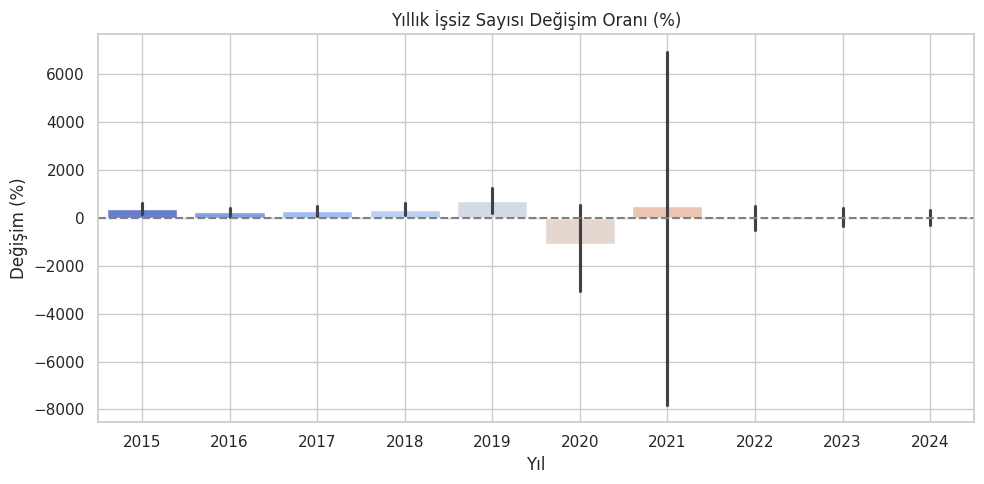

In [14]:
df_issiz['Değişim (%)'] = df_issiz['Değer'].pct_change() * 100

plt.figure(figsize=(10,5))
sns.barplot(data=df_issiz, x='Yıl', y='Değişim (%)', palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Yıllık İşsiz Sayısı Değişim Oranı (%)')
plt.ylabel('Değişim (%)')
plt.grid(True)
plt.tight_layout()
plt.show()